The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [171]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!

In [172]:
df = pd.read_csv('data/nobel.csv')

In [173]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


<AxesSubplot: >

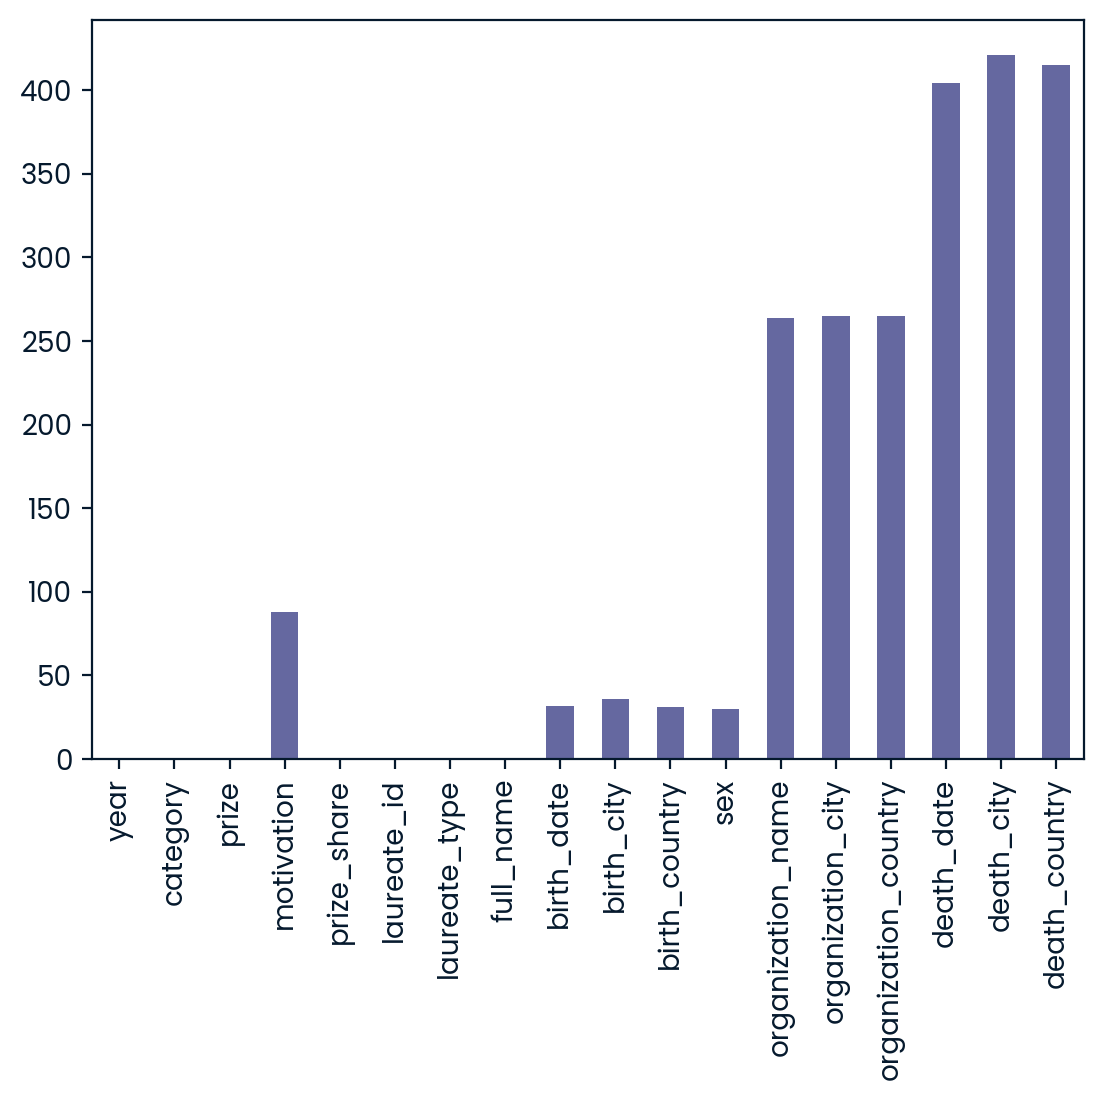

In [174]:
df.isna().sum().plot(kind = 'bar')

In [175]:
df.dropna(subset=['sex', 'birth_date'], inplace=True)

In [176]:
# What is the most commonly awarded gender and birth country?
top_gender = df['sex'].mode()[0]
top_country = df['birth_country'].mode()[0]
print(top_gender,top_country)

Male United States of America


In [177]:
# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
# Extract the birth year and create a new column for the decade
df['birth_year'] = pd.to_datetime(df['birth_date'], errors='coerce').dt.year
df['decade'] = (df['year'] // 10) * 10

# Filter for US-born Nobel Prize winners
us_winners = df[df['birth_country'] == 'United States of America']

# Group by decade and count the number of US winners and total winners
us_winners_by_decade = us_winners.groupby('decade').size()
total_winners_by_decade = df.groupby('decade').size()

# Calculate the ratio of US winners to total winners for each decade
ratio_by_decade = us_winners_by_decade / total_winners_by_decade

# Find the decade with the highest ratio
max_decade_usa = int(ratio_by_decade.idxmax())

In [178]:
# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
df = pd.read_csv('data/nobel.csv')
df['decade'] = (df['year'] // 10) * 10
df['female_winner'] = df['sex'] == 'Female'
prop_female_winners = df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
# Find the decade and category with the highest proportion of female laureates
max_female_decade_category = prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()][['decade', 'category']]

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]:max_female_decade_category['category'].values[0]}


In [179]:
max_female_dict

{2020: 'Literature'}

In [180]:
# Who was the first woman to receive a Nobel Prize, and in what category?
first_woman = df[df['sex']=='Female'].sort_values('year').head(1)
first_woman_name = first_woman['full_name'].iloc[0]
first_woman_category = first_woman['category'].iloc[0]

In [181]:
first_woman_category

'Physics'

In [182]:
# Which individuals or organizations have won more than one Nobel Prize throughout the years?
counts = df['full_name'].value_counts()
repeats = counts[counts >= 2].index
repeat_list = list(repeats)

In [183]:
repeat_list

['Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Marie Curie, née Sklodowska',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']